# 1. Importar bibliotecas

In [1]:
import pandas as pd

#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

# 2. Adquisición de datos

In [2]:
# Path de datasets local
Microdatos_2020_01_csv_path = 'Microdatos_2020_01.csv'
Microdatos_1999_01_csv_path = 'Microdatos_1999_01.csv'

# Path de datasets para Google Colab
#Microdatos_2020_01_csv_path = '/content/drive/MyDrive/Colab Notebooks/Microdatos_2020_01.csv'
#Microdatos_1999_01_csv_path = '/content/drive/MyDrive/Colab Notebooks/Microdatos_1999_01.csv'

# Path de datasets en Kaggle
#Microdatos_2020_01_csv_path = '/kaggle/input/microdatos-encuesta-expectativa/Microdatos_1999_01.csv'
#Microdatos_1999_01_csv_path = '/kaggle/input/microdatos-encuesta-expectativa/Microdatos_2020_01.csv'
#Inflacion_anual_csv_path = '/kaggle/input/inflacion-anual/Inflacin Anual.csv'

In [3]:
# Crea DataFrame con toda la historia
df_exp1 = pd.read_csv(Microdatos_2020_01_csv_path, encoding='latin-1')
df_exp2 = pd.read_csv(Microdatos_1999_01_csv_path, encoding='latin-1')
df_exp = pd.concat([df_exp1, df_exp2], ignore_index=True) # no se conservan los índices porque no son relevantes

In [4]:
df = df_exp # deja el dataframe para la siguiente etapa

# 3. Inspección inicial

Obtener información general sobre los datos, que abarca la cantidad de filas y columnas, los valores de los datos, los tipos de datos y los valores faltantes en el conjunto de datos.

In [5]:
# Dimensiones de los datos
df.shape
# Hay poco mas de un millón y medio de registros, y 7 columnas

(1551362, 7)

In [6]:
# Visualización de los primeros y últimos 5 renglones.
display(df.head(), df.tail())

,FechaEncuesta,NombreAbsolutoCorto,NombreRelativoCorto,NombreAbsolutoLargo,NombreRelativoLargo,IdAnalista,Dato
0,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,3,3.500
1,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,4,3.540
2,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,5,3.647
3,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,7,3.500
4,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,8,3.870


,FechaEncuesta,NombreAbsolutoCorto,NombreRelativoCorto,NombreAbsolutoLargo,NombreRelativoLargo,IdAnalista,Dato
1551357,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,59,1.9
1551358,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,61,1.6
1551359,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,65,2.2
1551360,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,92,1.9
1551361,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,94,2.0


In [7]:
# Las 7 columnas son: 'FechaEncuesta', 'NombreAbsolutoCorto', 'NombreRelativoCorto', 'NombreAbsolutoLargo',
# 'NombreRelativoLargo', 'IdAnalista', 'Dato'
df.columns

Index(['FechaEncuesta', 'NombreAbsolutoCorto', 'NombreRelativoCorto',
       'NombreAbsolutoLargo', 'NombreRelativoLargo', 'IdAnalista', 'Dato'],
      dtype='object')

In [8]:
# Tipos de las columnas
df.dtypes

FechaEncuesta           object
NombreAbsolutoCorto     object
NombreRelativoCorto     object
NombreAbsolutoLargo     object
NombreRelativoLargo     object
IdAnalista               int64
Dato                   float64
dtype: object

# 4. Preparación de los datos

## 4.1. Limpieza de los datos (duplicados, faltantes)

In [9]:
# No hay registros duplicados
df.duplicated().sum()

np.int64(0)

In [10]:
# No hay valores faltantes
df.isnull().sum()

FechaEncuesta          0
NombreAbsolutoCorto    0
NombreRelativoCorto    0
NombreAbsolutoLargo    0
NombreRelativoLargo    0
IdAnalista             0
Dato                   0
dtype: int64

## 4.2. Reducción de los datos

In [11]:
# Se eliminan las columnas con el nombre 'Absoluto' de la variable,
# porque son columnas derivadas de la columna FechaEncuesta y las columnas
# con nombre 'Relativo' y por tanto no agregan valor para el análisis.
df_red = df.drop(['NombreAbsolutoCorto', 'NombreAbsolutoLargo'], axis = 1)
df_red.head()

,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870


## 4.3. Conversión de tipo de datos

In [12]:
print('Antes:')
display(df_red.dtypes)

# Convierte la FechaEncuesta a datetime
df_conv=df_red.copy()
df_conv['FechaEncuesta'] = pd.to_datetime(df_conv['FechaEncuesta'], errors='raise')
print('\nDespués:')
display(df_conv.dtypes, df_conv.head())

Antes:


FechaEncuesta           object
NombreRelativoCorto     object
NombreRelativoLargo     object
IdAnalista               int64
Dato                   float64
dtype: object


Después:


FechaEncuesta          datetime64[ns]
NombreRelativoCorto            object
NombreRelativoLargo            object
IdAnalista                      int64
Dato                          float64
dtype: object

,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870


In [13]:
# Observando los valores únicos por columna, no parece haber variables categóricas, sino sólo contínuas
df_conv.nunique()

FechaEncuesta            309
NombreRelativoCorto      598
NombreRelativoLargo      601
IdAnalista                98
Dato                   26739
dtype: int64

## 4.4. Agregar columnas calculadas

In [14]:
df_agr=df_conv.copy()
df_agr['AñoEncuesta'] = df_agr['FechaEncuesta'].dt.year   # Columna con el año
df_agr['MesEncuesta'] = df_agr['FechaEncuesta'].dt.month  # Columna con el número de mes
display(df_agr.dtypes, df_agr.head(), df_agr.tail())

FechaEncuesta          datetime64[ns]
NombreRelativoCorto            object
NombreRelativoLargo            object
IdAnalista                      int64
Dato                          float64
AñoEncuesta                     int32
MesEncuesta                     int32
dtype: object

,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato,AñoEncuesta,MesEncuesta
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500,2020,1
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540,2020,1
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647,2020,1
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500,2020,1
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870,2020,1


,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato,AñoEncuesta,MesEncuesta
1551357,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,59,1.9,2019,12
1551358,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,61,1.6,2019,12
1551359,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,65,2.2,2019,12
1551360,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,92,1.9,2019,12
1551361,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,94,2.0,2019,12


## 4.5. Simplificar nombres columnas

In [15]:
# Simplifica el nombre de las columnas
print('Antes:\n', df_agr.columns)
df_simp=df_agr.rename(columns={
    'FechaEncuesta'      :'Fecha',
    'NombreRelativoCorto':'IdVariable',
    'NombreRelativoLargo':'Variable',
    'IdAnalista'         :'IdAnalista',
    'Dato'               :'Expectativa',
    'AñoEncuesta'        :'Año',
    'MesEncuesta'        :'Mes'
})
print('\nDespués:\n', df_simp.columns)
display(df_simp.head())

Antes:
 Index(['FechaEncuesta', 'NombreRelativoCorto', 'NombreRelativoLargo',
       'IdAnalista', 'Dato', 'AñoEncuesta', 'MesEncuesta'],
      dtype='object')

Después:
 Index(['Fecha', 'IdVariable', 'Variable', 'IdAnalista', 'Expectativa', 'Año',
       'Mes'],
      dtype='object')


,Fecha,IdVariable,Variable,IdAnalista,Expectativa,Año,Mes
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500,2020,1
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540,2020,1
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647,2020,1
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500,2020,1
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870,2020,1


## 4.6. Homologación de valores

### Orden renglones

In [16]:
# Se ve desordenado por fecha
print('Antes:\n',df_simp['Año'].unique())

# Ordenar por fecha
df_ord_r=df_simp.sort_values(by=['Año','Mes', 'Variable', 'IdAnalista'])
print('Después:\n',df_ord_r['Año'].unique())

Antes:
 [2020 2021 2022 2023 2024 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Después:
 [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


### Orden columnas

In [17]:
print('Antes:')
display(df_ord_r.columns,df_ord_r.head())

df_ord = df_ord_r.reindex(columns=['Fecha','Año', 'Mes','IdVariable','Variable','IdAnalista','Expectativa'])

print('\nDespués:')
display(df_ord.columns,df_ord.head())

Antes:


Index(['Fecha', 'IdVariable', 'Variable', 'IdAnalista', 'Expectativa', 'Año',
       'Mes'],
      dtype='object')

,Fecha,IdVariable,Variable,IdAnalista,Expectativa,Año,Mes
594618,1999-01-01,saldopubt,Balance económico del sector público al cierre...,2,-1.9,1999,1
594619,1999-01-01,saldopubt,Balance económico del sector público al cierre...,4,-1.6,1999,1
594620,1999-01-01,saldopubt,Balance económico del sector público al cierre...,9,-1.3,1999,1
594621,1999-01-01,saldopubt,Balance económico del sector público al cierre...,10,-1.5,1999,1
594622,1999-01-01,saldopubt,Balance económico del sector público al cierre...,11,-1.4,1999,1



Después:


Index(['Fecha', 'Año', 'Mes', 'IdVariable', 'Variable', 'IdAnalista',
       'Expectativa'],
      dtype='object')

,Fecha,Año,Mes,IdVariable,Variable,IdAnalista,Expectativa
594618,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,2,-1.9
594619,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,4,-1.6
594620,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,9,-1.3
594621,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,10,-1.5
594622,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,11,-1.4


### Variables

In [18]:
display(df_ord['IdVariable'].unique().size, df_ord['Variable'].unique().size)
# Parece que hay una disparidad entre el número de idVariable y Variable,
# porque debería ser el mismo número dado que se supone están pareadas.

598

601

In [19]:
# Buscar cualás IdVariable o Variable están repetidos.
df_vars_uniq=df_ord[['IdVariable','Variable']].drop_duplicates()

df_vars_varcount=df_vars_uniq.groupby(['Variable']).count()
df_vars_varrepetida=df_vars_varcount[(df_vars_varcount['IdVariable']>1)]
print(df_vars_varrepetida.size) # cero

df_vars_idvarcount=df_vars_uniq.groupby(['IdVariable']).count()
df_vars_idvarrepetida=df_vars_idvarcount[(df_vars_idvarcount['Variable']>1)]
print(df_vars_idvarrepetida.size) # tres renglones con 2 repeticiones: tcmestmas1, tcmestmas2, tcmestmas3

display(df_vars_idvarrepetida)
df_variables_con_mismo_idVariable=df_vars_uniq[df_vars_uniq['IdVariable'].isin(['tcmestmas1','tcmestmas2','tcmestmas3'])]
display(df_variables_con_mismo_idVariable)
display(df_variables_con_mismo_idVariable['Variable'].unique())

0
3


,Variable
IdVariable,
tcmestmas1,2
tcmestmas2,2
tcmestmas3,2


,IdVariable,Variable
594456,tcmestmas1,Valor del tipo de cambio promedio durante el m...
594484,tcmestmas2,Valor del tipo de cambio promedio durante el m...
594512,tcmestmas3,Valor del tipo de cambio promedio durante el m...
601195,tcmestmas1,Valor del tipo de cambio al cierre del siguien...
629394,tcmestmas2,Valor del tipo de cambio al cierre dentro de d...
1229261,tcmestmas3,Valor del tipo de cambio al cierre dentro de t...


array(['Valor del tipo de cambio promedio durante el mes t+1',
       'Valor del tipo de cambio promedio durante el mes t+2',
       'Valor del tipo de cambio promedio durante el mes t+3',
       'Valor del tipo de cambio al cierre del siguiente año',
       'Valor del tipo de cambio al cierre dentro de dos años',
       'Valor del tipo de cambio al cierre dentro de tres años'],
      dtype=object)

In [20]:
# Se eliminan los renglones con esas variables incongruentes
arr_idVariables_a_quitar=df_variables_con_mismo_idVariable['IdVariable'].unique()
display(arr_idVariables_a_quitar)
df_homol=df_ord.query("IdVariable not in @arr_idVariables_a_quitar")

display((df_homol.index.size-df_ord.index.size)/df_ord.index.size*100)
# Se quitaron aproximadamente el 2.6% de los renglones

array(['tcmestmas1', 'tcmestmas2', 'tcmestmas3'], dtype=object)

-2.5786373522105093

In [21]:
df = df_homol # deja el dataframe para la siguiente etapa

**PENDIENTE:**

5. Estadísticas descriptivas
6. Visualización
7. Análisis de variables
univariate, bivariate, or multivariate
8. Análisis de series de tiempo
When we analyze time series data, we can typically uncover patterns or trends that repeat over time and present a temporal seasonality. Key components of time series data include trends, seasonal variations, cyclical variations, and irregular variations or noise.

# Análisis de número de respuestas

<Axes: title={'center': 'Número de preguntas por año de la Encuesta (2024 año en curso)'}, xlabel='Año de la Enuesta'>

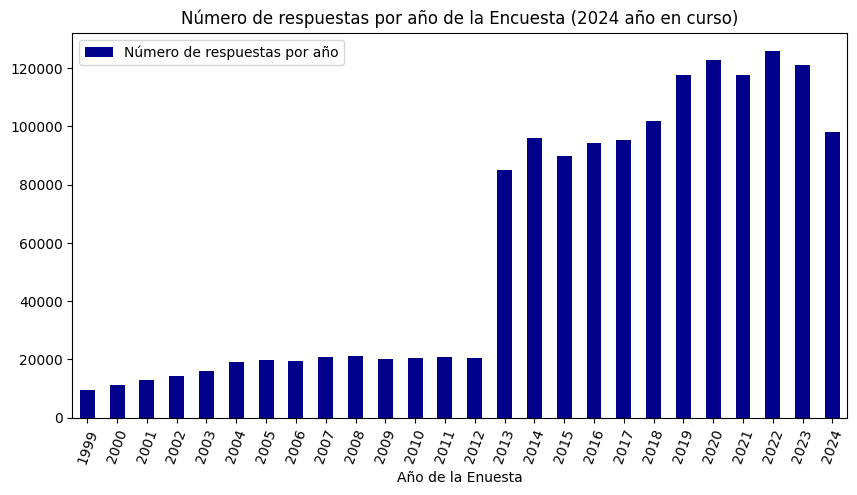

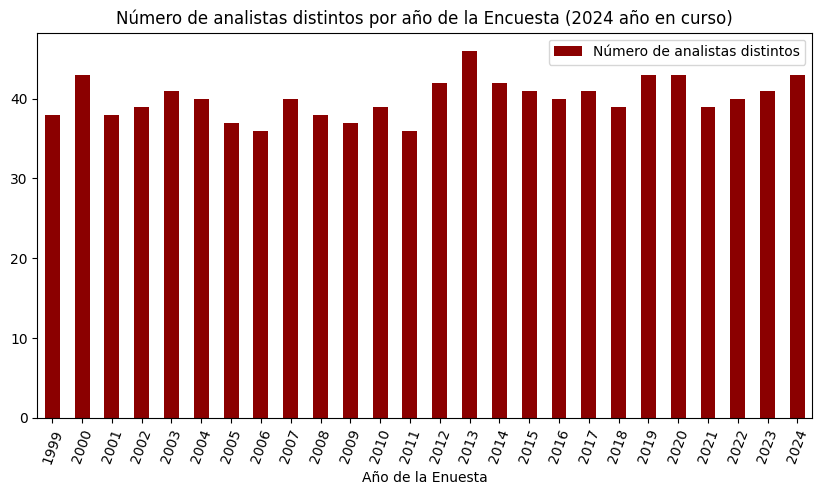

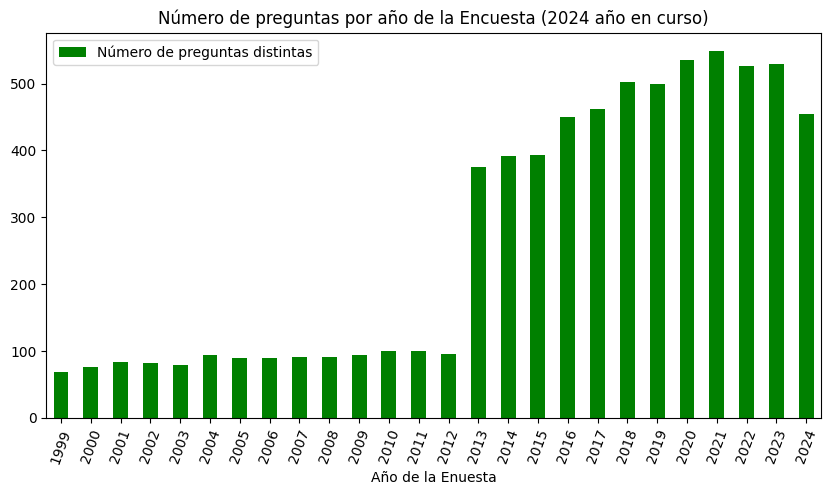

In [22]:
respuestasPorAño = df.groupby(by=["Año"])["Expectativa"].count()
respuestasPorAño.name = 'Número de respuestas por año'
respuestasPorAño.index.name = 'Año de la Enuesta'
respuestasPorAño.to_frame().plot.bar(
    title='Número de respuestas por año de la Encuesta (2024 año en curso)',
    rot=70,
    figsize=(10, 5),
    color='darkblue')

analistasDistintosPorAño = df.groupby(by=["Año"])["IdAnalista"].unique().apply(len)
analistasDistintosPorAño.name = 'Número de analistas distintos'
analistasDistintosPorAño.index.name = 'Año de la Enuesta'
analistasDistintosPorAño.to_frame().plot.bar(
    title='Número de analistas distintos por año de la Encuesta (2024 año en curso)',
    rot=70,
    figsize=(10, 5),
    color ='darkred')

analistasDistintosPorAño = df.groupby(by=["Año"])["Variable"].unique().apply(len)
analistasDistintosPorAño.name = 'Número de preguntas distintas'
analistasDistintosPorAño.index.name = 'Año de la Enuesta'
analistasDistintosPorAño.to_frame().plot.bar(
    title='Número de preguntas por año de la Encuesta (2024 año en curso)',
    rot=70,
    figsize=(10, 5),
    color ='g')

---

**$\therefore $ Se concluye que el aumento de respuestas desde 2013 se podría explicar por el aumento de preguntas más que por el aumento de analistas.**

---

,Año,Expectativa
594126,1999,16.20
594127,1999,15.43
594128,1999,17.61
594129,1999,15.98
594130,1999,17.80
...,...,...
583129,2024,4.84
583130,2024,4.46
583131,2024,4.70
583132,2024,4.42


Text(0.5, 1.0, 'Expectativa de Inflación General al cierre del año de la encuesta')

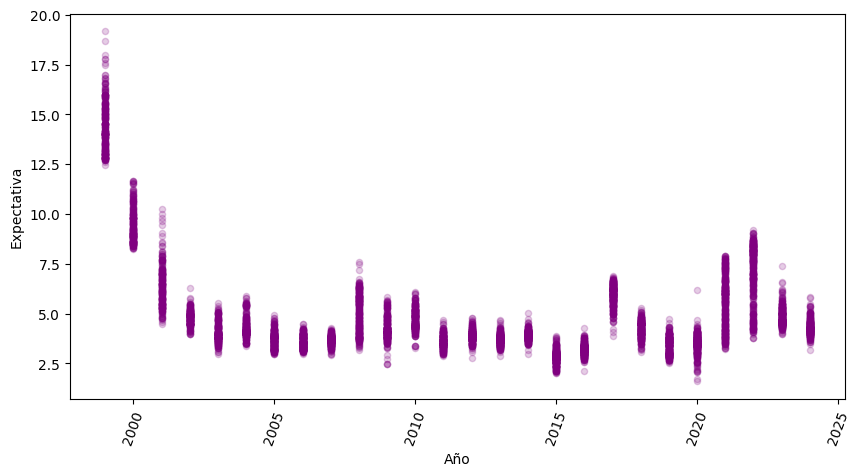

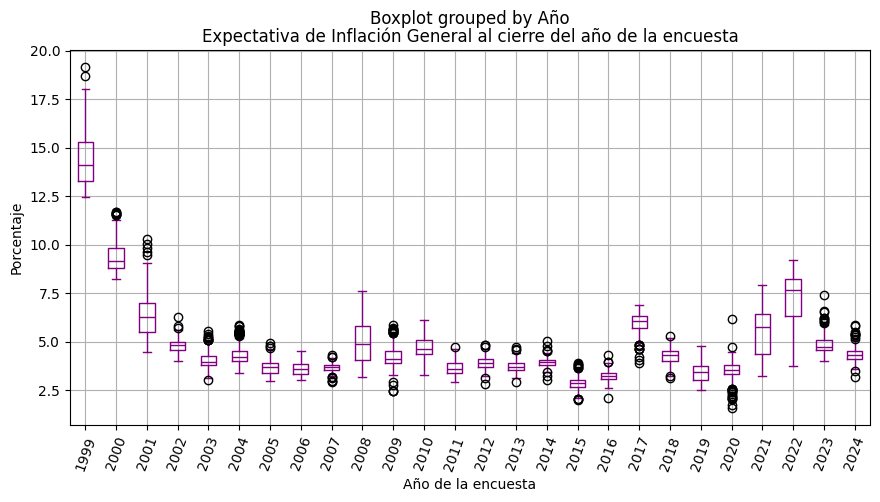

In [23]:
# Usando sintaxis de Pandas, sólo el año 1999:
#    inflacion_general_anual = df[(df['NombreRelativoCorto']=="infgent") & (df['AñoEncuesta']==1999)]
# Usando el método query:
inflacion_general_anual = df.query('IdVariable=="infgent"')

inflacion_general_anual = inflacion_general_anual[['Año','Expectativa']] # Crea dataframe con sólo estas dos columnas
display(inflacion_general_anual)



inflacion_general_anual.plot.scatter(
    x='Año', y='Expectativa',
    rot=70,
    figsize=(10, 5),
    color='purple', alpha=0.2)


# Se asume que la distribución es normal, por lo que hacemos una gráfica de caja
axes = inflacion_general_anual.boxplot(
    column='Expectativa', by='Año',
    ylabel='Porcentaje', xlabel='Año de la encuesta',
    rot=70,
    figsize=(10, 5),
    color='purple')
axes.set_title('Expectativa de Inflación General al cierre del año de la encuesta')